Investigating speed of scipy.stats.norm vs custom gaussian function

In [2]:
import numpy as np
from scipy.stats import norm

def gaussian(xvals, sigma, centre=0):
    # evaluate gaussian function with defined sigma and center at x
    gauss_eval = np.exp(-0.5 * ((xvals - centre) / sigma)**2) \
                    / (sigma * np.sqrt(2 * np.pi))
    return gauss_eval


Firstly, we can time both functions with arguments similar in size to those used within `fast_broaden.find_coeffs`

In [3]:
xvals = np.linspace(0,100,101)
sigma = np.linspace(1, 5, 10)

In [4]:
%timeit gaussian(xvals, sigma[:,np.newaxis])

17.2 µs ± 436 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
%timeit norm.pdf(xvals, scale=sigma[:,np.newaxis])

81.7 µs ± 565 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


For these inputs, the custom gaussian function is the faster option. Next, we can test how the speed of the functions scales when the length of the xvals array increases.

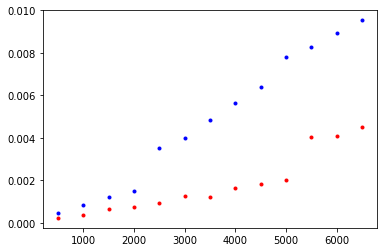

In [6]:
import matplotlib.pyplot as plt
import timeit

sigma = np.linspace(1, 10, 30)
lengths = np.arange(500,7000,500)

plt.figure()

for l in lengths:
    xvals = np.linspace(0, 1000, l)

    def run_gaussian():
        gaussian(xvals, sigma[:,np.newaxis])

    def run_norm_pdf():
        norm.pdf(xvals, scale=sigma[:,np.newaxis])

    run_time_gauss = timeit.Timer(stmt=run_gaussian).repeat(5,1)
    run_time_norm = timeit.Timer(stmt=run_norm_pdf).repeat(5,1)

    plt.plot(l, np.mean(run_time_gauss),'r.')
    plt.plot(l, np.mean(run_time_norm),'b.')    


Regardless of the length of the xvals array, the custom gaussian function is faster. Finally, it should be checked that the two functions produce the same output

In [11]:
xvals = np.linspace(-5,5,101)
sigma = 2
scipy_norm = norm.pdf(xvals, scale=sigma)
gaussian_eval = gaussian(xvals, sigma)

test = gaussian_eval.all() == scipy_norm.all()

print(test)

True
